# Домашнее задание

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [372]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Цунами, их источники и последствия

In [317]:
def wave_height(row):
    if row['MAXIMUM_HEIGHT'] <= 1:
        return 'mini (<1m)'
    elif 1 < row['MAXIMUM_HEIGHT'] <= 5:
        return 'small (1-5m)'
    elif 5 < row['MAXIMUM_HEIGHT'] <= 10:
        return 'middle (5-10m)'
    elif 10 < row['MAXIMUM_HEIGHT'] <= 15:
        return 'big (10-15m)'
    elif 15 < row['MAXIMUM_HEIGHT'] <= 20:
        return 'super_big (15-20m)'
    elif 20 < row['MAXIMUM_HEIGHT'] <= 50:
        return 'giant (20-50m)'
    elif row['MAXIMUM_HEIGHT'] > 50:
        return 'mega_tsunami (>50m)'

In [326]:
waves = pd.read_csv('waves.csv')
waves_sample = waves[ waves['YEAR'] >= 1940]
waves_sample = waves_sample[['SOURCE_ID', 'WAVE_ID', 'YEAR', 'COUNTRY', 'MAXIMUM_HEIGHT', 'DISTANCE_FROM_SOURCE', 'INJURIES', 'FATALITIES', 'HOUSES_DAMAGED', 'HOUSES_DESTROYED']]
waves_sample['TOTAL_AFTERMATH'] = waves_sample['INJURIES'] + waves_sample['FATALITIES'] + waves_sample['HOUSES_DAMAGED'] + waves_sample['HOUSES_DESTROYED']
waves_sample = waves_sample[['SOURCE_ID', 'WAVE_ID', 'YEAR', 'COUNTRY', 'MAXIMUM_HEIGHT', 'DISTANCE_FROM_SOURCE', 'TOTAL_AFTERMATH']]
waves_sample = waves_sample.loc[waves_sample['SOURCE_ID'] != 5413]
waves_sample = waves_sample.fillna(value = 0)
waves_sample['WAVE_TYPE'] = waves_sample.apply(wave_height, axis=1)
waves_sample.head()

,SOURCE_ID,WAVE_ID,YEAR,COUNTRY,MAXIMUM_HEIGHT,DISTANCE_FROM_SOURCE,TOTAL_AFTERMATH,WAVE_TYPE
4660,1739,28156,1940,PERU,0.00,94.0,0.0,mini (<1m)
4661,1741,2460,1940,JAPAN,2.50,172.0,0.0,small (1-5m)
4662,1741,12135,1940,JAPAN,0.22,156.0,0.0,mini (<1m)
4663,1741,12138,1940,JAPAN,2.00,174.0,0.0,small (1-5m)
4664,1741,28492,1940,JAPAN,1.20,0.0,0.0,small (1-5m)


In [327]:
sources = pd.read_csv('sources.csv')
sources_sample = sources[sources['YEAR'] >= 1940]
sources_sample = sources_sample[['SOURCE_ID', 'YEAR', 'PRIMARY_MAGNITUDE']]
sources_sample = sources_sample.fillna(value = 0)
sources_sample.head()

,SOURCE_ID,YEAR,PRIMARY_MAGNITUDE
1808,3400,1940,5.1
1809,1739,1940,8.2
1810,1741,1940,7.5
1811,4240,1940,0.0
1812,1742,1940,7.3


### Выборка
В выборку для анализа попали все данные о цунами и их источниках с 1940 по 2017. Более старые данные решил исключить для получения более точных расчетов. Также был исключен выброс - один источник, который вызвал более 6 тыс. цунами в один день - 11.03.2011, большинство из них в районе Японии (возможно, это множество мини-цунами, но данную информацию не проверял).

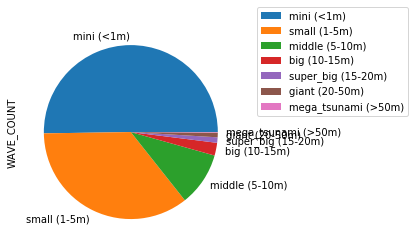

In [405]:
wave_type_count = waves_sample.groupby('WAVE_TYPE')[['WAVE_TYPE']].count()
wave_type_count.columns = ['WAVE_COUNT']
wave_type_count_ = wave_type_count.sort_values('WAVE_COUNT', ascending = False)
wave_type_count_.plot(kind='pie', y='WAVE_COUNT')
plt.legend(loc='best', bbox_to_anchor=(1.3, 0.6, 0.5, 0.5))

Так как единственное возможное предназначение круговых диаграмм - это показать, что чего-то очень мало, а чего-то очень много, то данная диаграма показывает, что, вопреки общему представлению о волнах цунами, их высота в большинстве случаев не первышает 5 метров. Хотя самая высокая зафиксированная волна  из данной выборки, да и вообще известная человеку, имеет высоту 524 м. 

Из Википедии: мегацунами в заливе Литуйя — стихийное бедствие, произошедшее 9 июля 1958 года в заливе Литуйя на юго-востоке Аляски. В результате землетрясения магнитудой 8,3 с гор сошёл мощный оползень. В воды залива обрушилось около 30 миллионов кубических метров камней и льда. Это привело к образованию гигантской волны цунами.

Из данной визуализации можно примерно иметь понимание, о величине волн, но возникает порос, сколько же их всего образуется в мире.

Text(0.5, 1.0, 'The number of waves over the years')

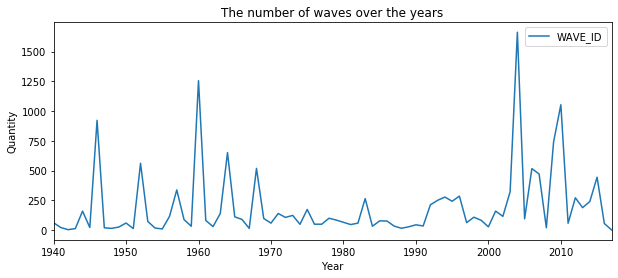

In [261]:
waves_by_year = waves_sample.groupby('YEAR')[['WAVE_ID']].count()
waves_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('The number of waves over the years')

В данном графике были использованны данные по количеству возникших цунами по годам с 1904 по 2017 год. Линейный график в данном случае (всего 2 переменные: года и количество волн) неплохо отражает ситуацию.

Из графика видно, что количество возникающих из года в год волн неоднородно и варьируется от почти нулевого значения до более чем 1500. Есть 2 гипотезы: есть откровенно плохие года в части землятресений-источников цунами и одно землятресение вызывает несколько цунами в зависимости от его магнитуды.

Text(0.5, 1.0, 'The number of waves by coutries (1940-2017 TOP-20)')

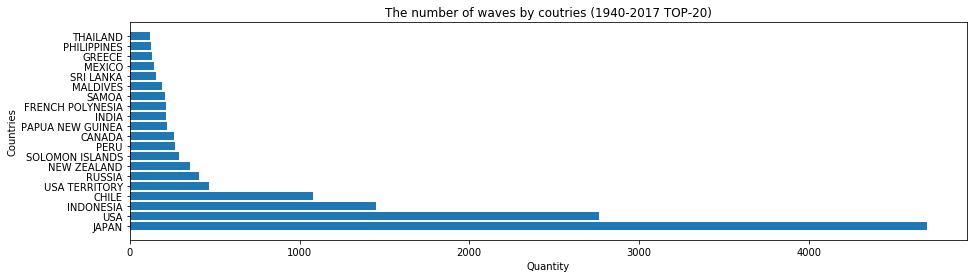

In [409]:
waves_by_country = waves_sample.groupby('COUNTRY')[['WAVE_ID']].count().sort_values('WAVE_ID', ascending=False).reset_index().head(20)
plt.barh(waves_by_country['COUNTRY'], waves_by_country['WAVE_ID'])
plt.xlabel('Quantity')
plt.ylabel('Countries')
plt.title('The number of waves by coutries (1940-2017 TOP-20)')

В данном графике использованы так же 2 переменные: страны и количество возникающих волн. В данном случае использована столбчатая диаграмма, т.к. данные взяты не по всем странам а по ТОП-20

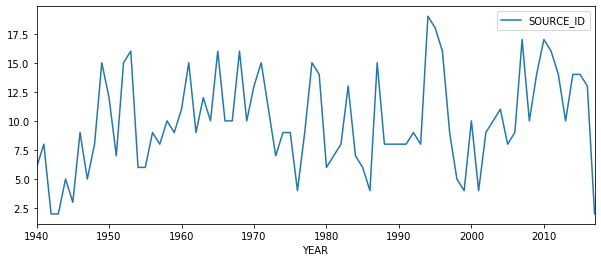

In [314]:
sources_sample = sources_sample.groupby('YEAR')[['SOURCE_ID']].count()
sources_sample.plot()

Для быстрой проверки первой гипотезы можно начать с графика прошедших в аналогичные года землятресений-источников цунами. На графике видно, землятресения-источники тоже неоднородно и даже ритмично проходят из года в год, но нет откровенных выбросов, как в случае с цунами. Соответственно можно предположить, количество цунами не зависит от количества землятресений-источников.

In [308]:
merged_ws = waves_sample.merge(sources_sample, on='SOURCE_ID')
# merged_ws.head()
merged_ws_group = merged_ws.groupby(['YEAR_x', 'SOURCE_ID']).agg({'WAVE_ID': 'count', 'PRIMARY_MAGNITUDE': 'mean'}).reset_index()
merged_ws_group.columns = ['Year','Source_ID', 'Number of waves from one source', 'Strength of earthquakes (The Richter scale)']

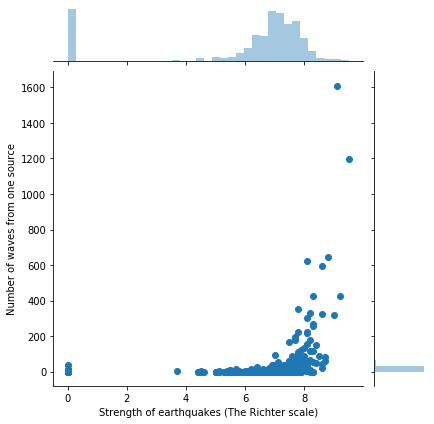

In [410]:
sns.jointplot(x='Strength of earthquakes (The Richter scale)', y='Number of waves from one source', data=merged_ws_group, kind='scatter')

Данный график использовался для того, чтобы проверить гипотезу по крреляции магнитуды землятресения-источника и количества образуемых землятресений. Из графика видно, во-первых, что в рассматриваемой выборке есть землятресения вызвающие от нескольких сотен до более чем полутора тысяч волн цунами, во-вторых, что прослеживается зависимость количества вызванных цунами от силы толчков (начиная с 7 по шкале Рихтера)

[Text(0, 0, 'mini (<1m)'),
 Text(0, 0, 'small (1-5m)'),
 Text(0, 0, 'middle (5-10m)'),
 Text(0, 0, 'big (10-15m)'),
 Text(0, 0, 'giant (20-50m)'),
 Text(0, 0, 'super_big (15-20m)'),
 Text(0, 0, 'mega_tsunami (>50m)')]

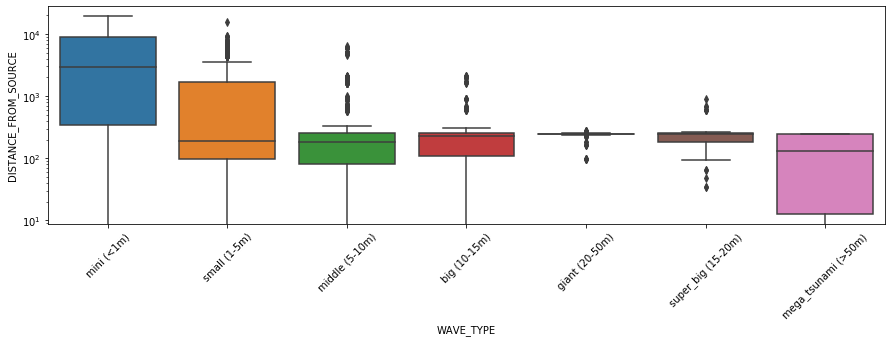

In [412]:
ax = sns.boxplot(x="WAVE_TYPE", y="DISTANCE_FROM_SOURCE", data=waves_sample.loc[waves_sample.YEAR > 2000])
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

В данном графике использовались данные по дистанции от места возникновения цунами до землятресения-источника и высоты волны. На нем прослеживается зависимость высоты волны от дистанции до источника.